# Pure Particle FCC Tensile Notes

Required source files:
* `modeling.in` : for creating a cylinder model.
* `deform.in` : runs a deformation as tensile test while recording desire variables.


## Create a Cylinder model

In [5]:
import subprocess
return_code = subprocess.call(['lmp_serial', '-in', 'modeling.lmps'])

LAMMPS (2 Aug 2023)
Lattice spacing in x,y,z = 0.0002 0.0002 0.0002
Created orthogonal box = (-0.0006 -0.0006 -0.001) to (0.0006 0.0006 0.001)
  1 by 1 by 1 MPI processor grid
Created 1090 atoms
  using lattice units in orthogonal box = (-0.0006 -0.0006 -0.001) to (0.0006 0.0006 0.001)
  create_atoms CPU = 0.000 seconds
System init for write_data ...
Total wall time: 0:00:00


## Read Cylinder model and simulate tensile strength test

In [53]:
import os
if os.path.exists('./data/ss.txt'):
    os.remove('./data/ss.txt')
    
return_code = subprocess.call(['mpirun', '-np', '8', 'lmp_mpi', '-in', 'deform.lmps'])

LAMMPS (2 Aug 2023)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 0.0002 0.0002 0.0002
Reading data file ...
  orthogonal box = (-0.0006 -0.0006 -0.001) to (0.0006 0.0006 0.001)
  2 by 2 by 2 MPI processor grid
  reading atoms ...
  1090 atoms
  reading velocities ...
  1090 velocities
  read_data CPU = 0.016 seconds
Changing box ...
  triclinic box = (-0.0006 -0.0006 -0.001) to (0.0006 0.0006 0.001) with tilt (0 0 0)
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.00068898816
  ghost atom cutoff = 0.00068898816
  binsize = 0.00034449408, bins = 4 4 6
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/newton/tri
     

## Post-Process data

In [55]:
import pandas as pd
from pandas import DataFrame as df

# load data
ss_directory = "./data/ss.txt"
with open(ss_directory, 'r') as file:
    data = pd.read_csv(file, sep=' ')[['strain', 'stress33']]

data

,strain,stress33
0,0.0000,-4.545352e-04
1,0.0001,4.068166e+06
2,0.0002,7.890252e+06
3,0.0003,1.130110e+07
4,0.0004,1.433919e+07
...,...,...
1496,0.1496,3.012125e+09
1497,0.1497,3.013123e+09
1498,0.1498,3.014161e+09
1499,0.1499,3.015235e+09


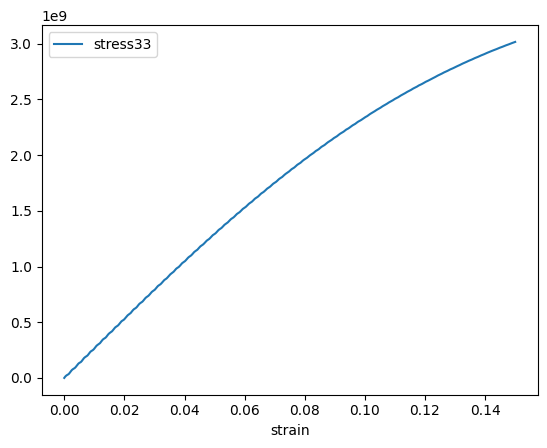

In [ ]:
# plot
plt = data.plot(x='strain')
plt.set_xlabel('$\epsilon$')
plt.set_ylabel('$\sigma$')